# Data Exploration and Cleaning

In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
# Import the csv as a dataframe

columns = ['pubmed_id', 'title', 'abstract', 'keywords',
           'journal','publication_date', 'authors', 'methods',
           'conclusions', 'results', 'copyrights', 'doi', 'xml']


jneuro = pd.read_csv('jneuro.csv', names=columns)

print(jneuro.shape)
jneuro.head()

(12734, 13)


,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,[],The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,[],The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,[],The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,NaN,NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


# Let's take a glance first

Let's make a bag of words with raw 'abstract' data before start cleaning to explore the most common words, to get a feeling of the texts' quality (=if the most common words are representative of subjects or not).


1. Exploring abstracts
<br>1.1. Extract tokens
<br>1.2. Build BOW (counting words) so we can see the most common tokens

In [4]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords', 'wordnet'])

[nltk_data] Downloading package stopwords to /home/hyoj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hyoj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Create a list with all valid abstracts
abstracts = [t for t in jneuro.abstract if type(t) == str]

In [6]:
abstracts

['Neuronal progenitors in the developing forebrain undergo dynamic competence states to ensure timely generation of specific excitatory and inhibitory neuronal subtypes from distinct neurogenic niches of the dorsal and ventral forebrain, respectively. Here we show evidence of progenitor plasticity when Sonic hedgehog (SHH) signaling is left unmodulated in the embryonic neocortex of the mammalian dorsal forebrain. We found that at early stages of corticogenesis, loss of Suppressor of Fused (Sufu), a potent inhibitor of SHH signaling, in neocortical progenitors, altered the transcriptomic landscape of male mouse embryos. Ectopic activation of SHH signaling occurred, via degradation of Gli3R, resulting in significant upregulation of Fibroblast Growth Factor 15 (',
 'Functional connectivity studies have identified at least two large-scale neural systems that constitute cognitive control networks - the frontoparietal network (FPN) and cingulo-opercular network (CON). Control networks are th

In [ ]:
joined_abstracts = ' '.join(abstracts)

In [4]:
# A function to get a list of tokens **
# Implement: Alphanumeric only, Remove stopwords, Lowercasing, Lemmatization

def get_tokens_normalized(text: str):
    # Instantiate word tokenizer
    tokenized = word_tokenize(str(text))
    # str(text) is needed at the moment to force the unclean data to be accepted by this function

    # Get lowercased tokens using Tweet tokenizer
    tokens_list = [t.lower() for t in tokenized]
    
    # Retain alphanumeric words only
    alpha_only = [t for t in tokens_list if t.isalnum()]
    
    # Remove all stop words: no_stops
    stopwords_en = stopwords.words('english')
    no_stops = [t for t in alpha_only if t not in stopwords_en]
    
    # Lemmatize
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    return lemmatized

In [5]:


# Let's choose small portion of the abstracts and tokenize them
get_tokens_normalized(abstracts[:1])

['progenitor',
 'developing',
 'forebrain',
 'undergo',
 'dynamic',
 'competence',
 'state',
 'ensure',
 'timely',
 'generation',
 'specific',
 'excitatory',
 'inhibitory',
 'neuronal',
 'subtypes',
 'distinct',
 'neurogenic',
 'niche',
 'dorsal',
 'ventral',
 'forebrain',
 'respectively',
 'show',
 'evidence',
 'progenitor',
 'plasticity',
 'sonic',
 'hedgehog',
 'shh',
 'signaling',
 'left',
 'unmodulated',
 'embryonic',
 'neocortex',
 'mammalian',
 'dorsal',
 'forebrain',
 'found',
 'early',
 'stage',
 'corticogenesis',
 'loss',
 'suppressor',
 'fused',
 'sufu',
 'potent',
 'inhibitor',
 'shh',
 'signaling',
 'neocortical',
 'progenitor',
 'altered',
 'transcriptomic',
 'landscape',
 'male',
 'mouse',
 'embryo',
 'ectopic',
 'activation',
 'shh',
 'signaling',
 'occurred',
 'via',
 'degradation',
 'gli3r',
 'resulting',
 'significant',
 'upregulation',
 'fibroblast',
 'growth',
 'factor',
 '15']

Let's try making bow of titles

In [6]:
# Convert the Series to a List
titles = [t for t in jneuro.title if type(t) == str]

# Let's choose small portion of the abstracts and tokenize them
get_tokens_normalized(titles[:10])

['salido',
 'ramamurthy',
 'proteoglycan',
 'impg2',
 'shape',
 'interphotoreceptor',
 'matrix',
 'modulates',
 'vision',
 'keitel',
 'et',
 'medial',
 'nucleus',
 'accumbens',
 'projection',
 'ventral',
 'tegmental',
 'area',
 'control',
 'food',
 'consumption',
 'neocortical',
 'progenitor',
 'specification',
 'program',
 'established',
 'combined',
 'modulation',
 'shh',
 'fgf',
 'signaling',
 'coordinator',
 'switcher',
 'hub',
 'adaptive',
 'task',
 'control',
 'visual',
 'speech',
 'human',
 'posterior',
 'superior',
 'temporal',
 'gyrus',
 'examined',
 'ieeg',
 'deconvolution',
 'infralimbic',
 'nucleus',
 'accumbens',
 'shell',
 'pathway',
 'suppresses',
 'conditioned',
 'aversion',
 'male',
 'female',
 'rat',
 'representation',
 'threat',
 'feature',
 'behavior',
 'human',
 'conflict',
 'anxiety',
 'task',
 'costa',
 'et',
 'primate',
 'orbitofrontal',
 'cortex',
 'code',
 'information',
 'relevant',
 'managing',
 'tradeoff',
 'signature',
 'criticality',
 'human',
 'cortical'

and keywords?

In [7]:
# Convert the Series to a List
keywords = [t for t in jneuro.keywords if type(t) == str]

# Let's choose small portion of the abstracts and tokenize them
get_tokens_normalized(keywords[:100])

['beta',
 'brain',
 'stimulation',
 'signal',
 'inhibition',
 'breaking',
 'relaxation',
 'receptor',
 'clamp',
 'location',
 'size',
 'representation',
 'receptor',
 'outgrowth',
 'regeneration',
 'sorla',
 'synaptic',
 'transmission',
 'term',
 'depression',
 'cortex',
 'psychiatry',
 'learning',
 'behavior',
 'plasticity',
 'training',
 'body',
 'brain',
 'stimulation',
 'cortex',
 'amplitude',
 'coupling',
 'analysis',
 'sleep',
 'sleep',
 'wave',
 'sleep',
 'elegans',
 'learning',
 'calcium',
 'disease',
 'neurogenesis',
 'period',
 'pain',
 'modulation',
 'cortex',
 'hypothalamic',
 'nucleus',
 'dynamic',
 'range',
 'cell',
 'array',
 'code',
 'receptor',
 'gaussian',
 'filter',
 'negativity',
 'coding',
 'activity',
 'modulation',
 'memory',
 'plasticity',
 'activity',
 'transmission',
 'location',
 'memory',
 'recognition',
 'memory',
 'channel',
 'channel',
 'model',
 'perception',
 'noise',
 'recognition',
 'cell',
 'ranvier',
 'disease',
 'vivo',
 'electrophysiology',
 'reco

- Since it's a formal documentation, word tokens are not too dirty (almost no coloquial expressions or typos)
- However, there are many 'stopwords' typically seen in research articles (ex: 'et', 'via'...) but unfiltered by the stopword function
    - TF-IDF might be useful to filter these out

## 1. Data types



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

In [9]:
jneuro.dtypes

pubmed_id            object
title                object
abstract             object
keywords             object
journal              object
publication_date     object
authors              object
methods             float64
conclusions         float64
results              object
copyrights           object
doi                  object
xml                  object
dtype: object

In [10]:
jneuro[['methods', 'conclusions']].describe()

,methods,conclusions
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


- **Next step**: change datatypes to its proper form
    1. publication_date : datetime
    2. methods & conclusions : drop since both columns are empty

In [11]:
# Before converting dtype of'publication_date'
print(jneuro['publication_date'].dtype)

# Convert the date type to datetime64
jneuro['publication_date'] = pd.to_datetime(jneuro['publication_date'])

# After converting dtype of'publication_date'
print(jneuro['publication_date'].dtype)

object
datetime64[ns]


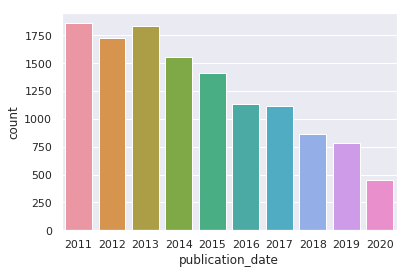

In [12]:
sns.countplot(jneuro['publication_date'].dt.year)

- Decreased # of total publication each year
    - Is this true? why?

In [13]:
# To check: Maybe issuing interval or articles per release changed?

In [14]:
# drop empty columns

jneuro_1 = jneuro.drop(columns=['methods', 'conclusions'])

In [15]:
jneuro_1.dtypes

pubmed_id                   object
title                       object
abstract                    object
keywords                    object
journal                     object
publication_date    datetime64[ns]
authors                     object
results                     object
copyrights                  object
doi                         object
xml                         object
dtype: object

## 2. Take care of empty values

In [16]:
# First, let's use .replace() and substitute ('[]') with np.nan
# To unify the respresentation of empty values

jneuro_1.replace(to_replace='[]', value=np.nan, inplace=True)
jneuro_1.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


In [17]:
jneuro_1.isnull().mean()

pubmed_id           0.000000
title               0.001885
abstract            0.053322
keywords            0.487514
journal             0.000000
publication_date    0.000000
authors             0.009895
results             0.999921
copyrights          0.515156
doi                 0.000550
xml                 0.000000
dtype: float64

### 2-1. Drop some less-informative columns

In [18]:
# Drop columns which have high proportion of empty values (>50%)
# and are not necessary information for research trend analysis
# Let's keep the 'keywords' column for now

cols_to_drop = ['results', 'copyrights']
jneuro_1.drop(columns=cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
journal                0
publication_date       0
authors              126
doi                    7
xml                    0
dtype: int64

In [19]:
# Drop more columns which do not provide any info about the contents

more_cols_to_drop = ['journal', 'doi', 'xml']
jneuro_1.drop(columns=more_cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
publication_date       0
authors              126
dtype: int64

### 2-2. Check articles missing title or abstract

For the first trial of trend analysis, let's assume that abstract is giving us enough information for analysis,
and therefore let's not focus on the information that title or keywords give (for the first trial, at least)

In [20]:
jneuro_2 = jneuro_1.copy()

print(jneuro_2.shape)
jneuro_2[jneuro_2.isnull().any(axis=1)].head()

(12734, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,2020-08-02,NaN
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,2020-08-02,NaN
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."


In [21]:
# case 1: No title, but abtract exist -> Let's keep the rows for now because we need abstracts.
# case 2: No title, no abstract -> Drop rows.
# case 3: Has title, no abstract -> Drop rows.

no_titles = jneuro_2['title'].isnull()
no_abstracts = jneuro_2['abstract'].isnull()

# Drop rows missing title or abstract
jneuro_2 = jneuro_2[~no_abstracts]

print(jneuro_2.shape)
jneuro_2.head()

(12055, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


In [22]:
jneuro_2.isnull().sum()

pubmed_id              0
title                 19
abstract               0
keywords            5545
publication_date       0
authors               47
dtype: int64

# 3. Data inconsistency

## 3-1. Erratum statetments

In [ ]:
example of 1

In [23]:
# Some titles starts their sentence with 'Erratum:...'
# In this case, these rows have a title, but their abstracts are uninforamative,
# since it's just informing an erratum about a previously published article.
# We can drop these rows using regular expression: r'Erratum:*'


find_erratum = jneuro_2['title'].str.contains(r'Erratum:*', na=False)

found_erratum = jneuro_2[find_erratum]

jneuro_2.drop(index=found_erratum.index, inplace=True)

print(jneuro_2.shape)
jneuro_2.head()

(12046, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


## 3-2. There are extremely short (incomplete) titles

In [24]:
indices = [i for i, title in enumerate(jneuro_2['title'].astype(str)) if len(title) < 15]

jneuro_2.iloc[indices]['title']

82                 NaN
173     Disruption of 
195         Tonic GABA
211                NaN
231                NaN
483              Npas1
530     A Mutation in 
542            The NGF
544         Zebrafish 
665                NaN
689                NaN
706                NaN
755         Dopamine D
771                 Ca
801      Circular RNA 
809                NaN
901                NaN
907                NaN
985                NPY
1080               NaN
1167     Presynaptic α
1311                 α
1312        Dopamine D
1383              5-HT
1416               NaN
1466               NaN
1510     Dorsal BNST α
1565            Adult 
1608              The 
1715                 α
1750               NaN
1778        Canonical 
1937     Heteromeric K
2372               NaN
2439               NaN
2617               NaN
2725                Ca
2772               NaN
2779               NaN
2880                 K
2889                 K
2978              The 
3000      Different Ca
3007       

### For now, we ignore this inconsistency in title, since we'll primarily focus on the abstract


**Note for future possibility of imputing titles:**
1. Some data can be still used as keywords (ex: 'Tonic GABA', 'Npas1', ...)
<br>But probably these keywords will appear in its abstract or keywords -> crosscheck needed


2. Some are uninformative as keywords (ex: 'Disruption of', 'α', 'The', ...)
<br>These should be eliminated from the data

## 3-3. pubmed_id

- pubmed id: unique identifier number assigned to each article record when it enters the PubMed system

In this dataset, there are some articles with lengthy pubmed_id values (probably import error?)

In [25]:
jneuro_3 = jneuro_2.copy()

print(jneuro_3['pubmed_id'].sort_values()[-5:]) # normal ids
print()
print(jneuro_3['pubmed_id'].sort_values()[:5]) # abnormal ids

6    32719163
5    32727819
4    32727820
3    32732324
2    32737167
Name: pubmed_id, dtype: object

12732    21209184\n10036231\n10051776\n10325225\n104545...
12731    21209185\n10223310\n10779526\n10839362\n108504...
12730    21209186\n8887786\n8822179\n9497414\n15523537\...
12729    21209187\n10401785\n10575034\n10604602\n106686...
12728    21209188\n11566213\n19181615\n11880492\n118259...
Name: pubmed_id, dtype: object


Not yet decided what to do with this column
We can ignore this and use pandas index
Or replace wrong values with correct ones (if it helps identifying articles later)

## 3-4. Duplicated values in ['title', 'abstract', 'pubmed _id'] ?

### a. Title duplicates

In [26]:
jneuro_3[jneuro_3['title'].duplicated()].sort_values('title')

,pubmed_id,title,abstract,keywords,publication_date,authors
3224,28011743\n22716999\n9643556\n18676031\n2559253...,5-HT,Neuroplasticity in the amygdala drives pain-re...,"['amygdala', 'depression', 'pain', 'plasticity...",2016-12-25,"[{'lastname': 'Ji', 'firstname': 'Guangchen', ..."
2725,28539424\n7619522\n8699256\n21688060\n1716930\...,Ca,We report functional and structural evidence f...,"['GCaMP', 'cochlear synaptopathy', 'excitotoxi...",2017-05-26,"[{'lastname': 'Sebe', 'firstname': 'Joy Y', 'i..."
2458,28842420\n24790184\n20946660\n23386614\n232777...,Conditional Deletion of,Biochemical and genetic evidence implicate sol...,"[""Alzheimer's"", 'memory', 'prion', 'transgenic']",2017-08-27,"[{'lastname': 'Salazar', 'firstname': 'Santiag..."
1312,30478031\n27386561\n16343792\n25853904\n288702...,Dopamine D,Dopamine (DA) modulates corticostriatal connec...,"['PET', 'aging', 'dopamine', 'fMRI', 'working ...",2018-11-28,"[{'lastname': 'Salami', 'firstname': 'Alireza'..."
2889,28320840\n10414303\n10627609\n10638760\n106487...,K,Membrane excitability in the axonal growth con...,"['Ca2+ influx', 'axon growth', 'growth cone', ...",2017-03-23,"[{'lastname': 'Huang', 'firstname': 'Chia-Yi',..."
2978,28213447\n11988176\n19037257\n11463917\n172295...,The,The protein family of degenerin/epithelial sod...,"['DEG/ENaC', 'Drosophila melanogaster', 'NMJ',...",2017-02-19,"[{'lastname': 'Hill', 'firstname': 'Alexis', '..."
1715,29875267\n24889613\n26996188\n25766584\n126281...,α,α,"['Ca2+ channel', 'photoreceptor', 'retina', 'r...",2018-06-08,"[{'lastname': 'Kerov', 'firstname': 'Vasily', ..."
211,32303647\n15504331\n18055635\n20188656\n779187...,NaN,In,"['Amnesiac', 'Drosophila olfactory memory', 'N...",2020-04-19,"[{'lastname': 'Turrel', 'firstname': 'Oriane',..."
231,32273485\n23283339\n18690213\n17468753\n239991...,NaN,The tuberal hypothalamus is comprised of the d...,"['Neurog2', 'VMH', 'neurogenesis', 'proneural ...",2020-04-11,"[{'lastname': 'Aslanpour', 'firstname': 'Shagh..."
665,31530645\n11549226\n11291099\n10197526\n128738...,NaN,Habituation is the adaptive behavioral outcome...,"['Btk', 'Drosophila', 'antipsychotics', 'habit...",2019-09-19,"[{'lastname': 'Roussou', 'firstname': 'Ilianna..."


- Again, we ignore the title

### b. Abstract duplicates

In [27]:
jneuro_3[jneuro_3['abstract'].duplicated()].sort_values('abstract')

,pubmed_id,title,abstract,keywords,publication_date,authors
936,31064859\n10102820\n10199598\n10381553\n104120...,CAMK2-Dependent Signaling in Neurons Is Essent...,Ca,"['CAMK2', 'hippocampus', 'survival', 'synaptic...",2019-05-09,"[{'lastname': 'Kool', 'firstname': 'Martijn J'..."
2298,29038242\n10864936\n10884437\n11285265\n113736...,Activity-Dependent Facilitation of Ca,Ca,"['CDF', 'CaV1.2', 'CaV1.3', 'KCa3.1', 'densin'...",2017-10-19,"[{'lastname': 'Sahu', 'firstname': 'Giriraj', ..."
2676,28592699\n10221985\n10561403\n10815751\n108639...,Lower Affinity of Isradipine for L-Type Ca,Ca,"['L-type calcium channels', ""Parkinson's disea...",2017-06-09,"[{'lastname': 'Ortner', 'firstname': 'Nadine J..."
3098,28115482\n27264607\n25249639\n24801620\n234554...,Mitochondria Maintain Distinct Ca,Ca,"['calcium', 'mitochondria', 'mitochondrial uni...",2017-01-25,"[{'lastname': 'Giarmarco', 'firstname': 'Miche..."
2793,28450542\n20600929\n22496577\n24910435\n185795...,Neuronal Chloride Regulation via KCC2 Is Modul...,GABA,"['GABA-B receptor', 'KCC2', 'chloride', 'prote...",2017-04-30,"[{'lastname': 'Wright', 'firstname': 'Rebecca'..."
310,32102921\n31230716\n23103875\n25139953\n116754...,Dopamine Receptor Dop1R2 Stabilizes Appetitive...,In,"['Drosophila', 'Raf/MAPK pathway', 'dopamine r...",2020-02-28,"[{'lastname': 'Sun', 'firstname': 'Huan', 'ini..."
2088,29305532\n10349831\n10471417\n10482904\n107131...,LRRK2 G2019S Induces Anxiety/Depression-like B...,Mutations in the,"['5-HT1A receptor', 'LRRK2', ""Parkinson's dise...",2018-01-07,"[{'lastname': 'Lim', 'firstname': 'Juhee', 'in..."
2989,28209736\n26609154\n10471508\n22617256\n103201...,"Pejvakin, a Candidate Stereociliary Rootlet Pr...",Mutations in the,"['DFNB59', 'auditory neuropathy spectrum disor...",2017-02-18,"[{'lastname': 'Kazmierczak', 'firstname': 'Mar..."
574,31641056\n10880397\n26079414\n16825673\n303759...,ApoE4 Alters ABCA1 Membrane Trafficking in Ast...,The,"['ABCA1', ""Alzheimer's disease"", 'ApoE', 'aggr...",2019-10-24,"[{'lastname': 'Rawat', 'firstname': 'Varun', '..."
3027,28167673\n10684870\n11031246\n11118494\n115644...,Ubiquitin Ligase RNF138 Promotes Episodic Atax...,Voltage-gated Ca,"['E3 ubiquitin ligase', 'calcium channel', 'ep...",2017-02-09,"[{'lastname': 'Fu', 'firstname': 'Ssu-Ju', 'in..."


In [28]:
# Let's drop these rows since these abstracts are incomplete hence less informative for our analysis

print(f'Before drop-rows: {jneuro_3.shape}')

jneuro_3 = jneuro_3[~jneuro_3['abstract'].duplicated()]

print(f'After drop-rows: {jneuro_3.shape}')

Before drop-rows: (12046, 6)
After drop-rows: (12036, 6)


### c. PubMed_id duplicates

In [29]:
jneuro_3[jneuro_3['pubmed_id'].duplicated()].sort_values('pubmed_id')

,pubmed_id,title,abstract,keywords,publication_date,authors


- No duplicated publication id

## More cleanings that can be done:

- more data inconsistency?
- flatten author column at some point?

### Let's export this cleaner 'jneuro_3' dataframe as a csv file and process it in the next notebook: <br>Text representation and information extraction

In [30]:
print(jneuro_3.shape)
jneuro_3.head()

(12036, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


In [31]:
jneuro_3.to_csv("jneuro_clean.csv")

In [32]:
# Sanity check

jc = pd.read_csv("jneuro_clean.csv", index_col=0)

print(jc.shape)
jc.head()

(12036, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


In [33]:
are_they_equal = jneuro_3[~(jneuro_3.pubmed_id.isin(jc.pubmed_id))]

are_they_equal

,pubmed_id,title,abstract,keywords,publication_date,authors
